# Bibliotecas e constantes

In [353]:
import pandas as pd
import numpy as np
import seaborn as sns
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import random

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=DeprecationWarning)

from joblib import load

from itertools import combinations_with_replacement, product

In [4]:
horizonte = 10

# Importação dos dados históricos e modelos de cada ativo

## Importando df_ativos, utilizado para fitting dos modelos:

In [5]:
df_ativos = pd.read_csv("..\Dados\df_ativos\df_ativos_raw.csv", index_col=0)
df_ativos.sort_index(inplace=True) #Organizando o df por datas
df_ativos.drop(columns = 'Adj Close', inplace=True)
df_ativos

,Ativo,Open,High,Low,Close,Volume
2014-09-17,BTC-USD,465.864014,468.174011,452.421997,457.334015,21056800
2014-09-17,DOGE-USD,0.000293,0.000299,0.000260,0.000268,1463600
2014-09-17,XMR-USD,1.841200,1.898070,1.647920,1.768350,291633
2014-09-17,LTC-USD,5.085890,5.170770,4.965950,5.058550,3071840
2014-09-17,DASH-USD,3.327650,3.878730,3.297880,3.753940,574556
...,...,...,...,...,...,...
2021-08-20,XLM-USD,0.366957,0.387311,0.360759,0.385290,780181594
2021-08-20,BNB-USD,430.975037,457.603729,422.080170,454.936310,2451578694
2021-08-20,LINK-USD,27.060467,28.979713,26.707174,28.701841,1751490161
2021-08-20,MKR-USD,3745.071533,3850.748535,3705.013672,3813.081787,145465521


In [614]:
ativos = list(df_ativos['Ativo'].unique())
ativos

['BTC-USD',
 'DOGE-USD',
 'XMR-USD',
 'LTC-USD',
 'DASH-USD',
 'XLM-USD',
 'XRP-USD',
 'USDT-USD',
 'ETH-USD',
 'ETC-USD',
 'NEO-USD',
 'MKR-USD',
 'MIOTA-USD',
 'EOS-USD',
 'BCH-USD',
 'BNB-USD',
 'TRX-USD',
 'LINK-USD',
 'ADA-USD',
 'XTZ-USD',
 'FIL-USD',
 'THETA-USD']

## Carregando os modelos salvos:

In [7]:
path_models = "..\Modelos"

dict_models = {}

for crypto in ativos:

    nome = "\modelo_" + str(crypto) + "_final.joblib"
    
    dict_models[crypto] = load(path_models + nome)
    
    print(f"{nome} carregado.")
    

\modelo_BTC-USD_final.joblib carregado.
\modelo_DOGE-USD_final.joblib carregado.
\modelo_XMR-USD_final.joblib carregado.
\modelo_LTC-USD_final.joblib carregado.
\modelo_DASH-USD_final.joblib carregado.
\modelo_XLM-USD_final.joblib carregado.
\modelo_XRP-USD_final.joblib carregado.
\modelo_USDT-USD_final.joblib carregado.
\modelo_ETH-USD_final.joblib carregado.
\modelo_ETC-USD_final.joblib carregado.
\modelo_NEO-USD_final.joblib carregado.
\modelo_MKR-USD_final.joblib carregado.
\modelo_MIOTA-USD_final.joblib carregado.
\modelo_EOS-USD_final.joblib carregado.
\modelo_BCH-USD_final.joblib carregado.
\modelo_BNB-USD_final.joblib carregado.
\modelo_TRX-USD_final.joblib carregado.
\modelo_LINK-USD_final.joblib carregado.
\modelo_ADA-USD_final.joblib carregado.
\modelo_XTZ-USD_final.joblib carregado.
\modelo_FIL-USD_final.joblib carregado.
\modelo_THETA-USD_final.joblib carregado.


In [8]:
dict_models

{'BTC-USD': XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.5, max_delta_step=0, max_depth=3,
              min_child_weight=5.0, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=6, num_parallel_tree=1, random_state=0,
              reg_alpha=0.0001, reg_lambda=0.01, scale_pos_weight=1,
              subsample=0.8, tree_method='exact', validate_parameters=1,
              verbosity=None),
 'DOGE-USD': XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.5, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=

# Cálculo de retorno e risco histórico para cada ativo

In [9]:
df_ativos[df_ativos['Ativo'] == 'BTC-USD']['Close'].pct_change()

2014-09-17         NaN
2014-09-18   -0.071926
2014-09-19   -0.069843
2014-09-20    0.035735
2014-09-21   -0.024659
                ...   
2021-08-16   -0.022159
2021-08-17   -0.028456
2021-08-18    0.002368
2021-08-19    0.042775
2021-08-20    0.056116
Name: Close, Length: 2526, dtype: float64

In [10]:
df_retornos = pd.DataFrame(columns = ativos)

for crypto in ativos:
    
    df_retornos[crypto] = df_ativos[df_ativos['Ativo'] == crypto]['Close'].pct_change()
    #df_retornos[crypto].fillna(value = df_retornos[crypto].mean(), inplace = True) #Como nem todos os ativos possuem dados desde o inicio, podemos equilibrar isso preenchendo com a média.
    
df_retornos


,BTC-USD,DOGE-USD,XMR-USD,LTC-USD,DASH-USD,XLM-USD,XRP-USD,USDT-USD,ETH-USD,ETC-USD,...,MIOTA-USD,EOS-USD,BCH-USD,BNB-USD,TRX-USD,LINK-USD,ADA-USD,XTZ-USD,FIL-USD,THETA-USD
2014-09-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18,-0.071926,0.111940,-0.112574,-0.073800,0.030624,0.125000,-0.048898,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-19,-0.069843,-0.070470,-0.073225,-0.076295,-0.112900,0.120370,-0.037585,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-20,0.035735,0.054152,-0.125938,-0.009550,-0.072451,-0.067149,-0.034399,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-21,-0.024659,-0.013699,0.002313,-0.009453,-0.066887,-0.040975,-0.042330,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-16,-0.022159,-0.060702,-0.016032,-0.032719,-0.060772,-0.046970,-0.075431,-0.000205,-0.046517,-0.073575,...,-0.053240,-0.026152,-0.038868,0.006936,-0.036897,0.006462,-0.041369,-0.024921,0.004148,0.023220
2021-08-17,-0.028456,-0.066330,-0.043306,-0.055978,-0.037059,-0.084576,-0.077913,-0.000219,-0.044880,-0.092833,...,-0.081011,-0.086759,-0.054824,-0.037277,-0.050344,-0.068586,-0.073490,-0.066742,-0.053503,-0.087754
2021-08-18,0.002368,0.014350,-0.010830,-0.008564,0.080253,0.003536,0.043615,0.000255,0.001739,0.017603,...,-0.017685,-0.012669,-0.006838,-0.009100,-0.004533,-0.024667,0.094446,-0.015128,-0.028469,-0.015489
2021-08-19,0.042775,0.044133,0.041776,0.048369,0.046617,0.070694,0.075687,-0.000789,0.053844,0.045937,...,0.056254,0.051176,0.038547,0.082203,0.040631,0.060827,0.151563,0.084152,0.042483,0.042129


Vamos gerar a matriz de correlação entre os retornos de cada ativo. A correlação dos demais ativos com o BTC não é tão forte quanto o consenso popular diz, sendo muito fraca para ativos como USDT(esperado, por ser uma Stablecoin) 

In [618]:
df_retornos.to_csv(r"C:\Users\Alexandre\OneDrive\Documentos\1. PRO\Data Science\Projeto Integrador\Dados\\df_retornos\df_retornos.csv", index = True)

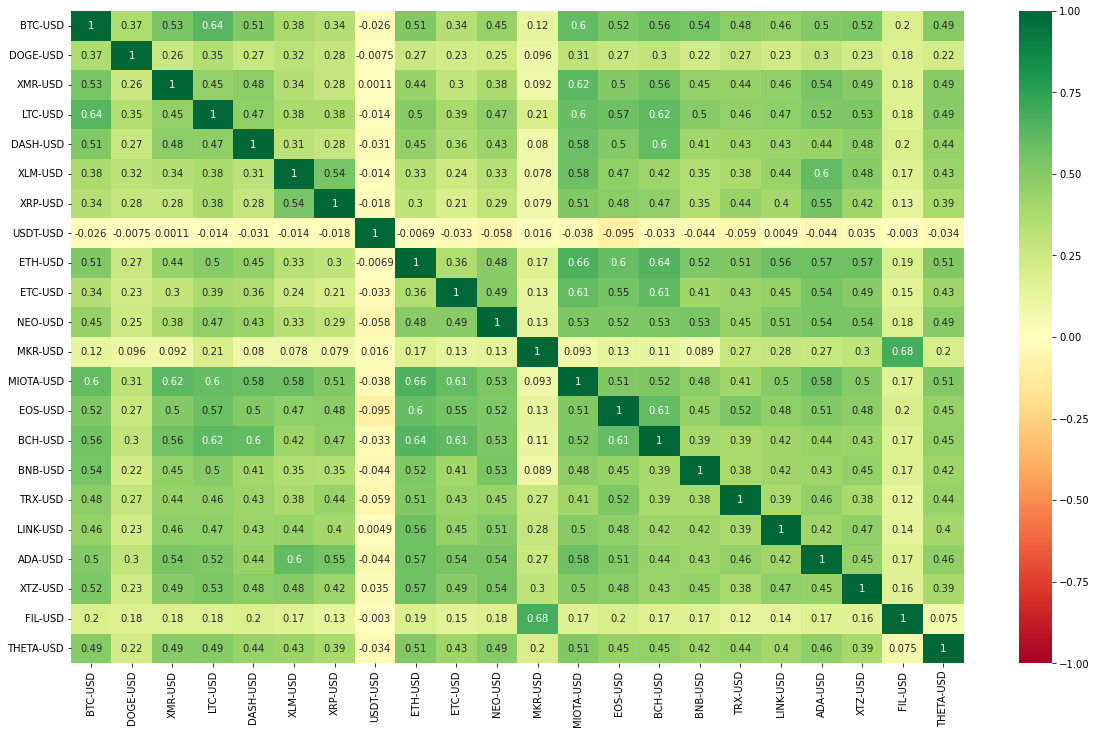

In [11]:
fig, ax = plt.subplots(figsize = (20,12))
sns.heatmap(df_retornos.corr(), vmin = -1, vmax = 1, annot = True, cmap="RdYlGn")
plt.show()

## Calculando retorno diário e anual de cada ativo:

In [638]:
retornos_avg = df_retornos.mean()
retornos_avg

BTC-USD      0.002632
DOGE-USD     0.005844
XMR-USD      0.004110
LTC-USD      0.003086
DASH-USD     0.003518
XLM-USD      0.004755
XRP-USD      0.004635
USDT-USD     0.000076
ETH-USD      0.005406
ETC-USD      0.005719
NEO-USD      0.006135
MKR-USD      0.014736
MIOTA-USD    0.003072
EOS-USD      0.004303
BCH-USD      0.003162
BNB-USD      0.008502
TRX-USD      0.006426
LINK-USD     0.006693
ADA-USD      0.006136
XTZ-USD      0.003085
FIL-USD      0.009882
THETA-USD    0.005956
dtype: float64

In [13]:
retornos_aa = retornos_avg*365
retornos_aa

BTC-USD      0.960571
DOGE-USD     2.133168
XMR-USD      1.500314
LTC-USD      1.126275
DASH-USD     1.283975
XLM-USD      1.735458
XRP-USD      1.691757
USDT-USD     0.027636
ETH-USD      1.973206
ETC-USD      2.087579
NEO-USD      2.239194
MKR-USD      5.378728
MIOTA-USD    1.121456
EOS-USD      1.570676
BCH-USD      1.153948
BNB-USD      3.103266
TRX-USD      2.345472
LINK-USD     2.442864
ADA-USD      2.239753
XTZ-USD      1.125959
FIL-USD      3.606831
THETA-USD    2.173946
dtype: float64

Em média, o BTC teve uma valorização de 0,026% ao dia, o que equivale a um retorno anual de 96% desde o seu lançamento. Nesses quase 7 anos desde set/14, a moeda se valorizou cerca de 108 vezes o seu preço de lançamento em 7 anos.
Como faço essa conta? Simples:
- Divido o preço mais atual (último da lista) pelo de lançamento (primeira ocorrência da lista) ou
- Faço a conta: (1 + 96%)**7

In [14]:
#Colocando tudo num df, que depois receberá as métricas de risco:

df_fin = pd.DataFrame(index = ativos)

df_fin['ret_avg_dia_passado'] = retornos_avg
df_fin['ret_avg_ano_passado'] = retornos_aa

df_fin

,ret_avg_dia_passado,ret_avg_ano_passado
BTC-USD,0.002632,0.960571
DOGE-USD,0.005844,2.133168
XMR-USD,0.004110,1.500314
LTC-USD,0.003086,1.126275
DASH-USD,0.003518,1.283975
XLM-USD,0.004755,1.735458
XRP-USD,0.004635,1.691757
USDT-USD,0.000076,0.027636
ETH-USD,0.005406,1.973206
ETC-USD,0.005719,2.087579


## Calculando risco médio de cada ativo:

In [15]:
df_retornos.std(skipna=True) #Desvio padrão de cada ativo

BTC-USD      0.039207
DOGE-USD     0.092191
XMR-USD      0.066136
LTC-USD      0.058605
DASH-USD     0.062682
XLM-USD      0.080865
XRP-USD      0.077114
USDT-USD     0.017603
ETH-USD      0.064640
ETC-USD      0.102861
NEO-USD      0.089024
MKR-USD      0.330994
MIOTA-USD    0.073269
EOS-USD      0.086575
BCH-USD      0.076619
BNB-USD      0.079142
TRX-USD      0.094379
LINK-USD     0.079789
ADA-USD      0.082884
XTZ-USD      0.072224
FIL-USD      0.171039
THETA-USD    0.080493
dtype: float64

In [16]:
df_retornos.var() #Variância (std.**2) de cada ativo

BTC-USD      0.001537
DOGE-USD     0.008499
XMR-USD      0.004374
LTC-USD      0.003435
DASH-USD     0.003929
XLM-USD      0.006539
XRP-USD      0.005947
USDT-USD     0.000310
ETH-USD      0.004178
ETC-USD      0.010580
NEO-USD      0.007925
MKR-USD      0.109557
MIOTA-USD    0.005368
EOS-USD      0.007495
BCH-USD      0.005871
BNB-USD      0.006263
TRX-USD      0.008907
LINK-USD     0.006366
ADA-USD      0.006870
XTZ-USD      0.005216
FIL-USD      0.029254
THETA-USD    0.006479
dtype: float64

In [299]:
matriz_covar = df_retornos.cov() #Matriz de covariâncias entre os ativos. Será importante ao calcularmos o risco dos portfólios.
matriz_covar

,BTC-USD,DOGE-USD,XMR-USD,LTC-USD,DASH-USD,XLM-USD,XRP-USD,USDT-USD,ETH-USD,ETC-USD,...,MIOTA-USD,EOS-USD,BCH-USD,BNB-USD,TRX-USD,LINK-USD,ADA-USD,XTZ-USD,FIL-USD,THETA-USD
BTC-USD,0.001537,0.001344,0.001383,0.001464,0.001261,0.001190,0.001020,-0.000018,0.001314,0.001425,...,0.001889,0.001941,0.001806,0.001812,0.001927,0.001525,0.001746,0.001580,0.001368,0.001577
DOGE-USD,0.001344,0.008499,0.001589,0.001898,0.001573,0.002362,0.002003,-0.000012,0.001662,0.002438,...,0.002446,0.002537,0.002472,0.001901,0.002864,0.001991,0.002706,0.001834,0.002331,0.001990
XMR-USD,0.001383,0.001589,0.004374,0.001762,0.002002,0.001809,0.001434,0.000001,0.001866,0.002025,...,0.002721,0.002587,0.002542,0.002124,0.002359,0.002093,0.002529,0.002009,0.001716,0.002140
LTC-USD,0.001464,0.001898,0.001762,0.003435,0.001723,0.001791,0.001728,-0.000015,0.001863,0.002449,...,0.002651,0.002964,0.002802,0.002330,0.002547,0.002184,0.002515,0.002213,0.001637,0.002165
DASH-USD,0.001261,0.001573,0.002002,0.001723,0.003929,0.001585,0.001344,-0.000033,0.001829,0.002400,...,0.002761,0.002826,0.002986,0.002093,0.002603,0.002199,0.002358,0.002214,0.002053,0.002190
XLM-USD,0.001190,0.002362,0.001809,0.001791,0.001585,0.006539,0.003388,-0.000020,0.001760,0.002151,...,0.003243,0.003124,0.002484,0.002126,0.002713,0.002663,0.003801,0.002658,0.001761,0.002149
XRP-USD,0.001020,0.002003,0.001434,0.001728,0.001344,0.003388,0.005947,-0.000024,0.001556,0.001850,...,0.002700,0.003007,0.002580,0.001984,0.003023,0.002322,0.003297,0.002229,0.001452,0.001992
USDT-USD,-0.000018,-0.000012,0.000001,-0.000015,-0.000033,-0.000020,-0.000024,0.000310,-0.000002,-0.000019,...,-0.000016,-0.000045,-0.000014,-0.000019,-0.000029,0.000002,-0.000019,0.000013,-0.000003,-0.000012
ETH-USD,0.001314,0.001662,0.001866,0.001863,0.001829,0.001760,0.001556,-0.000002,0.004178,0.002111,...,0.002611,0.002788,0.002599,0.002157,0.002543,0.002352,0.002470,0.002147,0.001708,0.002110
ETC-USD,0.001425,0.002438,0.002025,0.002449,0.002400,0.002151,0.001850,-0.000019,0.002111,0.010580,...,0.002993,0.003200,0.003139,0.002172,0.002737,0.002378,0.002939,0.002330,0.001716,0.002181


Vamos gravar junto ao df_fin o desvio padrão dos retornos diários de cada ativo, necessário para o cálculo dos ratios de Sharpe e Roy's First-Safety:

In [18]:
df_fin['std_dev_passado'] = df_retornos.std(skipna=True)
df_fin

,ret_avg_dia_passado,ret_avg_ano_passado,std_dev_passado
BTC-USD,0.002632,0.960571,0.039207
DOGE-USD,0.005844,2.133168,0.092191
XMR-USD,0.004110,1.500314,0.066136
LTC-USD,0.003086,1.126275,0.058605
DASH-USD,0.003518,1.283975,0.062682
XLM-USD,0.004755,1.735458,0.080865
XRP-USD,0.004635,1.691757,0.077114
USDT-USD,0.000076,0.027636,0.017603
ETH-USD,0.005406,1.973206,0.064640
ETC-USD,0.005719,2.087579,0.102861


Aqui, conseguimos ter uma boa noção dos retornos passados e dos riscos (medidos pelo desvio padrão dos retornos) de cada ativo. BTC pode não ser a mais rentável entre as nossas cryptos, mas certamente é o menos volátil (desconsiderando o USDT, naturalmente)

Ainda, vamos calcular o "Downside Standard Deviation", que serve para identificarmos o desvio padrão de desvios negativos. Ele aparecerá novamente para o cálculo do ratio de Sortino de cada portfólio:

In [19]:
square_downside = np.square(np.clip(df_retornos, np.NINF, 0))

std_dev_down_passado = pd.Series(index = ativos)

for ativo in ativos:
    
    std_dev_down_passado.loc[ativo] = np.sqrt(np.nanmean(square_downside[ativo]))
    
    
df_fin['std_dev_down_passado'] = std_dev_down_passado
df_fin
    

,ret_avg_dia_passado,ret_avg_ano_passado,std_dev_passado,std_dev_down_passado
BTC-USD,0.002632,0.960571,0.039207,0.026571
DOGE-USD,0.005844,2.133168,0.092191,0.038601
XMR-USD,0.004110,1.500314,0.066136,0.040248
LTC-USD,0.003086,1.126275,0.058605,0.035670
DASH-USD,0.003518,1.283975,0.062682,0.037264
XLM-USD,0.004755,1.735458,0.080865,0.041268
XRP-USD,0.004635,1.691757,0.077114,0.037500
USDT-USD,0.000076,0.027636,0.017603,0.010805
ETH-USD,0.005406,1.973206,0.064640,0.040905
ETC-USD,0.005719,2.087579,0.102861,0.043497


# Projeção de retorno e risco (previsão dos modelos) -> importar mais dados usando YF

In [20]:
#Buscar ultima data (ultimo indice do df_ativos), importar os dados dessa data até ontem, gerar as features necessárias, fazer as previsões, armazenar a expectativa de retorno futuro médio e desvio padrão futuro em df_fin

In [21]:
yesterday = dt.date.today() - dt.timedelta(days=1)
yesterday = yesterday.strftime('%Y-%m-%d')
yesterday

'2021-09-05'

In [22]:
inicio =  dt.date.today() - dt.timedelta(days = 15) #é preciso acessar dados de 15 dias atrás para montar as features necessárias
inicio = inicio.strftime('%Y-%m-%d')
inicio

'2021-08-22'

In [23]:
#Vamos acessar os dados de cada ativo, e armazená-los tudo num dataframe único, o df_features.

df_features = pd.DataFrame(columns = ['Ativo', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'])

for ativo in ativos:
     
    
    print(f"Iniciando coleta do ativo {ativo}")
    
    dados = yf.download(ativo, inicio, yesterday)
    dados['Ativo'] = ativo
    
    df_features = pd.concat([df_features, dados])

df_features

Iniciando coleta do ativo BTC-USD
[*********************100%***********************]  1 of 1 completed
Iniciando coleta do ativo DOGE-USD
[*********************100%***********************]  1 of 1 completed
Iniciando coleta do ativo XMR-USD
[*********************100%***********************]  1 of 1 completed
Iniciando coleta do ativo LTC-USD
[*********************100%***********************]  1 of 1 completed
Iniciando coleta do ativo DASH-USD
[*********************100%***********************]  1 of 1 completed
Iniciando coleta do ativo XLM-USD
[*********************100%***********************]  1 of 1 completed
Iniciando coleta do ativo XRP-USD
[*********************100%***********************]  1 of 1 completed
Iniciando coleta do ativo USDT-USD
[*********************100%***********************]  1 of 1 completed
Iniciando coleta do ativo ETH-USD
[*********************100%***********************]  1 of 1 completed
Iniciando coleta do ativo ETC-USD
[*********************100%**********

,Ativo,Open,High,Low,Close,Adj Close,Volume
2021-08-22,BTC-USD,48869.105469,49471.609375,48199.941406,49321.652344,49321.652344,25370975378
2021-08-23,BTC-USD,49291.675781,50482.078125,49074.605469,49546.148438,49546.148438,34305053719
2021-08-24,BTC-USD,49562.347656,49878.769531,47687.117188,47706.117188,47706.117188,35361168834
2021-08-25,BTC-USD,47727.257812,49202.878906,47163.613281,48960.789062,48960.789062,32646349931
2021-08-26,BTC-USD,49002.640625,49347.582031,46405.781250,46942.218750,46942.218750,32666549568
...,...,...,...,...,...,...,...
2021-09-01,THETA-USD,6.664911,7.177047,6.508936,7.107553,7.107553,307285134
2021-09-02,THETA-USD,7.112447,7.237600,6.910338,7.026413,7.026413,265301640
2021-09-03,THETA-USD,7.027130,7.351134,6.903741,7.241940,7.241940,303546221
2021-09-04,THETA-USD,7.250394,7.711438,7.205366,7.515120,7.515120,360725102


In [24]:
df_features.sort_index(inplace=True) #Organizando o df por datas
df_features.drop(columns = 'Adj Close', inplace=True)
df_features['Volume'] = df_features['Volume'].astype(float)
df_features

,Ativo,Open,High,Low,Close,Volume
2021-08-22,BTC-USD,48869.105469,49471.609375,48199.941406,49321.652344,2.537098e+10
2021-08-22,XMR-USD,288.199554,306.623138,276.326080,305.607056,2.482929e+08
2021-08-22,TRX-USD,0.088062,0.090063,0.086140,0.088112,8.258169e+08
2021-08-22,BNB-USD,449.225616,458.402893,439.168213,449.053497,1.826866e+09
2021-08-22,LTC-USD,179.907410,189.588257,179.148270,186.313095,2.051815e+09
...,...,...,...,...,...,...
2021-09-05,BNB-USD,497.704865,505.116699,489.474915,504.619873,1.899639e+09
2021-09-05,TRX-USD,0.101513,0.105184,0.101191,0.105147,1.471892e+09
2021-09-05,LINK-USD,29.901953,33.503429,29.580906,33.503429,1.590083e+09
2021-09-05,XTZ-USD,5.401400,5.592382,5.278016,5.561299,2.909316e+08


In [25]:
def relative_strength_idx(df, ativo, n): #MUDAR PARAM "n" AQUI PARA VARIAR A MÉDIA MÓVEL
    close = df[df['Ativo']==ativo]['Close']
    delta = close.diff()
    pricesUp = delta.copy()
    pricesDown = delta.copy()
    pricesUp[pricesUp < 0] = 0
    pricesDown[pricesDown > 0] = 0
    rollUp = pricesUp.rolling(n).mean()
    rollDown = pricesDown.abs().rolling(n).mean()
    rs = rollUp / rollDown
    rsi = 100 - (100 / (1 + rs))
    return rsi

In [26]:
df_features['1: ln(C/C-1)'] = pd.Series(dtype=float)
df_features['2: ln(C-1/C-2)'] = pd.Series(dtype=float)
df_features['3: ln(C-2/C-3)'] = pd.Series(dtype=float)
df_features['4: ln(C-3/C-4)'] = pd.Series(dtype=float)
df_features['5: ln(H/O)'] = pd.Series(dtype=float)
df_features['6: ln(H/O-1)'] = pd.Series(dtype=float)
df_features['7: ln(H/O-2)'] = pd.Series(dtype=float)
df_features['8: ln(H/O-3)'] = pd.Series(dtype=float)
df_features['9: ln(H-1/O-1)'] = pd.Series(dtype=float)
df_features['10: ln(H-2/O-2)'] = pd.Series(dtype=float)
df_features['11: ln(H-3/O-3)'] = pd.Series(dtype=float)
df_features['12: ln(L/O)'] = pd.Series(dtype=float)
df_features['13: ln(L-1/O-1)'] = pd.Series(dtype=float)
df_features['14: ln(L-2/O-2)'] = pd.Series(dtype=float)
df_features['15: ln(L-3/O-3)'] = pd.Series(dtype=float)
df_features['16: True Range'] = pd.Series(dtype=float)
df_features['17: ATR 5d'] = pd.Series(dtype=float)
df_features['17b: ATR 10d'] = pd.Series(dtype=float)
df_features['17c: ATR 14d'] = pd.Series(dtype=float)
df_features['18: MI 3d'] = pd.Series(dtype=float)
df_features['18b: MI 7d'] = pd.Series(dtype=float)
df_features['19: RSI 5d'] = pd.Series(dtype=float)
df_features['19b: RSI 10d'] = pd.Series(dtype=float)
df_features['19c: RSI 14d'] = pd.Series(dtype=float)
df_features['20: ln(Vol/Vol-1)'] = pd.Series(dtype=float)
df_features['21: ln(Vol-1/Vol-2)'] = pd.Series(dtype=float)


for ativo in ativos:
    
    df_features.loc[df_features['Ativo'] == ativo,'1: ln(C/C-1)'] = np.log(df_features.loc[df_features['Ativo'] == ativo]['Close'] / df_features.loc[df_features['Ativo'] == ativo,'Close'].shift(1))
    df_features.loc[df_features['Ativo'] == ativo,'2: ln(C-1/C-2)'] = np.log(df_features.loc[df_features['Ativo'] == ativo]['Close'].shift(1)/df_features.loc[df_features['Ativo'] == ativo]['Close'].shift(2))
    df_features.loc[df_features['Ativo'] == ativo,'3: ln(C-2/C-3)'] = np.log(df_features.loc[df_features['Ativo'] == ativo]['Close'].shift(2)/df_features.loc[df_features['Ativo'] == ativo]['Close'].shift(3))
    df_features.loc[df_features['Ativo'] == ativo,'4: ln(C-3/C-4)'] = np.log(df_features.loc[df_features['Ativo'] == ativo]['Close'].shift(3)/df_features.loc[df_features['Ativo'] == ativo]['Close'].shift(4))
    df_features.loc[df_features['Ativo'] == ativo,'5: ln(H/O)'] = np.log(df_features.loc[df_features['Ativo'] == ativo]['High']/df_features.loc[df_features['Ativo'] == ativo]['Open'])
    df_features.loc[df_features['Ativo'] == ativo,'6: ln(H/O-1)'] = np.log(df_features.loc[df_features['Ativo'] == ativo]['High']/df_features.loc[df_features['Ativo'] == ativo]['Open'].shift(1))
    df_features.loc[df_features['Ativo'] == ativo,'7: ln(H/O-2)'] = np.log(df_features.loc[df_features['Ativo'] == ativo]['High']/df_features.loc[df_features['Ativo'] == ativo]['Open'].shift(2))
    df_features.loc[df_features['Ativo'] == ativo,'8: ln(H/O-3)'] = np.log(df_features.loc[df_features['Ativo'] == ativo]['High']/df_features.loc[df_features['Ativo'] == ativo]['Open'].shift(3))
    df_features.loc[df_features['Ativo'] == ativo,'9: ln(H-1/O-1)'] = np.log(df_features.loc[df_features['Ativo'] == ativo]['High'].shift(1)/df_features.loc[df_features['Ativo'] == ativo]['Open'].shift(1))
    df_features.loc[df_features['Ativo'] == ativo,'10: ln(H-2/O-2)'] = np.log(df_features.loc[df_features['Ativo'] == ativo]['High'].shift(2)/df_features.loc[df_features['Ativo'] == ativo]['Open'].shift(2))
    df_features.loc[df_features['Ativo'] == ativo,'11: ln(H-3/O-3)'] = np.log(df_features.loc[df_features['Ativo'] == ativo]['High'].shift(3)/df_features.loc[df_features['Ativo'] == ativo]['Open'].shift(3))
    df_features.loc[df_features['Ativo'] == ativo,'12: ln(L/O)'] = np.log(df_features.loc[df_features['Ativo'] == ativo]['Low']/df_features.loc[df_features['Ativo'] == ativo]['Open'])
    df_features.loc[df_features['Ativo'] == ativo,'13: ln(L-1/O-1)'] = np.log(df_features.loc[df_features['Ativo'] == ativo]['Low'].shift(1)/df_features.loc[df_features['Ativo'] == ativo]['Open'].shift(1))
    df_features.loc[df_features['Ativo'] == ativo,'14: ln(L-2/O-2)'] = np.log(df_features.loc[df_features['Ativo'] == ativo]['Low'].shift(2)/df_features.loc[df_features['Ativo'] == ativo]['Open'].shift(2))
    df_features.loc[df_features['Ativo'] == ativo,'15: ln(L-3/O-3)'] = np.log(df_features.loc[df_features['Ativo'] == ativo]['Low'].shift(3)/df_features.loc[df_features['Ativo'] == ativo]['Open'].shift(3))
    
    
    df_features.loc[df_features['Ativo'] == ativo,'16: True Range'] = np.nanmax([np.abs(df_features.loc[df_features['Ativo'] == ativo, 'High'] - df_features.loc[df_features['Ativo'] == ativo, 'Low']), 
                                                                            np.abs(df_features.loc[df_features['Ativo'] == ativo, 'High'] - df_features.loc[df_features['Ativo'] == ativo, 'Close'].shift(1)), 
                                                                            np.abs(df_features.loc[df_features['Ativo'] == ativo, 'Low'] - df_features.loc[df_features['Ativo'] == ativo, 'Close'].shift(1))], axis=0)
    
    
    df_features.loc[df_features['Ativo'] == ativo,'17: ATR 5d'] = df_features.loc[df_features['Ativo'] == ativo,'16: True Range'].rolling(window=5).mean()
    df_features.loc[df_features['Ativo'] == ativo,'17b: ATR 10d'] = df_features.loc[df_features['Ativo'] == ativo,'16: True Range'].rolling(window=10).mean()
    df_features.loc[df_features['Ativo'] == ativo,'17c: ATR 14d'] = df_features.loc[df_features['Ativo'] == ativo,'16: True Range'].rolling(window=14).mean()
    
    df_features.loc[df_features['Ativo'] == ativo,'18: MI 3d'] = df_features.loc[df_features['Ativo'] == ativo, 'Close'] - df_features.loc[df_features['Ativo'] == ativo, 'Close'].shift(3)
    df_features.loc[df_features['Ativo'] == ativo,'18b: MI 7d'] = df_features.loc[df_features['Ativo'] == ativo, 'Close'] - df_features.loc[df_features['Ativo'] == ativo, 'Close'].shift(7)

    df_features.loc[df_features['Ativo'] == ativo,'19: RSI 5d'] = relative_strength_idx(df_features,ativo, n=5)
    df_features.loc[df_features['Ativo'] == ativo,'19b: RSI 10d'] = relative_strength_idx(df_features,ativo, n=10)
    df_features.loc[df_features['Ativo'] == ativo,'19c: RSI 14d'] = relative_strength_idx(df_features,ativo, n=14)
    
    df_features.loc[df_features['Ativo'] == ativo,'20: ln(Vol/Vol-1)'] = np.log(df_features.loc[df_features['Ativo'] == ativo, 'Volume'] / df_features.loc[df_features['Ativo'] == ativo,'Volume'].shift(1))
    
    df_features.loc[df_features['Ativo'] == ativo,'21: ln(Vol-1/Vol-2)'] = np.log(df_features.loc[df_features['Ativo'] == ativo, 'Volume'].shift(1) / df_features.loc[df_features['Ativo'] == ativo,'Volume'].shift(2))

    
    #Vamos manter o preço de fechamento ('Close') para, a partir das previsões, podermos calcular o retorno esperado para o horizonte, de forma a calcular o retorno total esperado para o ativo, mesclando passado e projeções. 
    

df_features.drop(columns = ['Open', 'High', 'Low'], inplace=True) #Dropando colunas inúteis.
df_features.dropna(inplace=True)

df_features

,Ativo,Close,Volume,1: ln(C/C-1),2: ln(C-1/C-2),3: ln(C-2/C-3),4: ln(C-3/C-4),5: ln(H/O),6: ln(H/O-1),7: ln(H/O-2),...,17: ATR 5d,17b: ATR 10d,17c: ATR 14d,18: MI 3d,18b: MI 7d,19: RSI 5d,19b: RSI 10d,19c: RSI 14d,20: ln(Vol/Vol-1),21: ln(Vol-1/Vol-2)
2021-09-05,FIL-USD,113.604744,3.834941e+09,0.179901,0.199394,0.003872,-0.016532,0.233269,0.434849,0.438092,...,11.158427,7.639510,7.279037,36.160492,39.931938,96.791781,89.746764,77.545320,0.575280,1.321633
2021-09-05,NEO-USD,65.712944,1.128211e+09,0.124536,0.014083,0.031375,0.001414,0.130297,0.143834,0.175210,...,4.579903,4.114001,4.837219,10.272945,11.212154,100.000000,82.092322,63.063106,0.792822,-0.216099
2021-09-05,ADA-USD,2.910824,4.259328e+09,0.027168,-0.046701,0.001619,0.031771,0.042709,-0.003857,-0.001469,...,0.168830,0.199434,0.222421,-0.052614,0.054838,66.904281,67.291149,55.780615,-0.093315,-0.114768
2021-09-05,BTC-USD,51753.410156,3.032268e+10,0.035575,-0.001615,0.014044,0.009793,0.037936,0.036506,0.051029,...,2032.564844,1879.864063,1955.630859,2425.687500,2923.578125,98.299364,76.788196,58.492062,-0.211680,-0.142407
2021-09-05,DOGE-USD,0.314527,2.393034e+09,0.049330,0.010459,0.001074,0.005265,0.051075,0.062012,0.066460,...,0.017670,0.018283,0.020503,0.018572,0.033402,100.000000,75.277615,49.853849,0.055785,-0.052023
2021-09-05,XMR-USD,315.196075,2.482881e+08,0.031720,0.005151,0.003378,-0.001785,0.044141,0.048868,0.052061,...,15.452441,17.087799,21.009166,12.434357,23.624115,98.202662,62.862027,53.393919,0.248645,-0.166596
2021-09-05,LTC-USD,231.333984,3.796951e+09,0.085587,-0.002857,0.148279,0.014510,0.090085,0.085419,0.234687,...,19.333331,13.940778,13.258475,47.716736,56.629761,99.002274,88.763268,70.566893,-0.122112,-0.241340
2021-09-05,DASH-USD,263.671722,3.981784e+08,0.046122,0.017065,0.034533,0.000690,0.064125,0.081755,0.115731,...,16.221347,16.286790,19.879539,24.546967,38.100571,100.000000,68.907866,52.589526,0.176984,-0.039819
2021-09-05,XLM-USD,0.397391,8.892660e+08,0.070604,0.003782,0.022784,0.018894,0.071560,0.075559,0.101218,...,0.021659,0.020932,0.021727,0.036798,0.053650,100.000000,76.126960,56.731157,0.145800,-0.043070
2021-09-05,XRP-USD,1.305498,4.077886e+09,0.038828,-0.027998,0.027564,0.017209,0.041567,0.013621,0.042359,...,0.073685,0.081411,0.086848,0.049174,0.164666,81.156037,74.203354,55.272761,-0.049393,-0.319469


Agora que já temos as features prontas para uma projeção com horizonte de 10 dias, vamos proceder com a previsão de cada ativo, utilizando o modelo específico e armazenando tudo num dataframe. Em seguida, vamos comparar o preço do último dia com o preço projetado e calcular o retorno diário para cada ativo:

In [27]:
dict_models[ativo]

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.5, max_delta_step=0, max_depth=4,
             min_child_weight=0.5, missing=nan, monotone_constraints='()',
             n_estimators=50, n_jobs=6, num_parallel_tree=1, random_state=0,
             reg_alpha=0.0, reg_lambda=0.01, scale_pos_weight=1, subsample=0.8,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [28]:
df_pred = pd.DataFrame(columns = ['Close_10d', 'Close'], index = ativos)


for ativo in ativos:
    
    X = df_features[df_features['Ativo'] == ativo].drop(['Close', 'Ativo'], axis = 1)
    model = dict_models[ativo]
    df_pred.loc[ativo,'Close_10d'] = model.predict(X)[0]
    
    df_pred.loc[ativo,'Close'] = df_features[df_features['Ativo']==ativo]['Close'][0]

df_pred

,Close_10d,Close
BTC-USD,43663.902344,51753.410156
DOGE-USD,0.229865,0.314527
XMR-USD,254.602203,315.196075
LTC-USD,240.694672,231.333984
DASH-USD,192.131363,263.671722
XLM-USD,0.452968,0.397391
XRP-USD,0.921275,1.305498
USDT-USD,0.999861,1.000261
ETH-USD,3164.223633,3952.133545
ETC-USD,50.466068,73.595299


Vamos então plugar o retorno futuro no nosso df_fin, para então consolidar nossas métricas de retorno por ativo:

In [29]:
df_fin['ret_futuro_dia'] = (df_pred['Close_10d'] / df_pred['Close'] - 1)/10
df_fin

,ret_avg_dia_passado,ret_avg_ano_passado,std_dev_passado,std_dev_down_passado,ret_futuro_dia
BTC-USD,0.002632,0.960571,0.039207,0.026571,-0.015631
DOGE-USD,0.005844,2.133168,0.092191,0.038601,-0.026917
XMR-USD,0.004110,1.500314,0.066136,0.040248,-0.019224
LTC-USD,0.003086,1.126275,0.058605,0.035670,0.004046
DASH-USD,0.003518,1.283975,0.062682,0.037264,-0.027132
XLM-USD,0.004755,1.735458,0.080865,0.041268,0.013985
XRP-USD,0.004635,1.691757,0.077114,0.037500,-0.029431
USDT-USD,0.000076,0.027636,0.017603,0.010805,-0.00004
ETH-USD,0.005406,1.973206,0.064640,0.040905,-0.019936
ETC-USD,0.005719,2.087579,0.102861,0.043497,-0.031428


# Consolidação de retorno e risco

## Vamos testar ponderações entre retorno passado com o projetado? Ex.: 90% do passado e 10% do projetado vão nos dar a composição a ser utilizada para o retorno

In [30]:
df_fin['retorno_dia_esperado'] = df_fin['ret_avg_dia_passado'] * 0.95 + df_fin['ret_futuro_dia'] * 0.05
df_fin

,ret_avg_dia_passado,ret_avg_ano_passado,std_dev_passado,std_dev_down_passado,ret_futuro_dia,retorno_dia_esperado
BTC-USD,0.002632,0.960571,0.039207,0.026571,-0.015631,0.001719
DOGE-USD,0.005844,2.133168,0.092191,0.038601,-0.026917,0.004206
XMR-USD,0.004110,1.500314,0.066136,0.040248,-0.019224,0.002944
LTC-USD,0.003086,1.126275,0.058605,0.035670,0.004046,0.003134
DASH-USD,0.003518,1.283975,0.062682,0.037264,-0.027132,0.001985
XLM-USD,0.004755,1.735458,0.080865,0.041268,0.013985,0.005216
XRP-USD,0.004635,1.691757,0.077114,0.037500,-0.029431,0.002932
USDT-USD,0.000076,0.027636,0.017603,0.010805,-0.00004,0.00007
ETH-USD,0.005406,1.973206,0.064640,0.040905,-0.019936,0.004139
ETC-USD,0.005719,2.087579,0.102861,0.043497,-0.031428,0.003862


Exemplo conclusivo: A projeção para os próximos 10 dias do BTC é ruim. O fato de termos considerado 5% de peso para a previsão nos dá um retorno esperado equivalente à metade do retorno médio da moeda nos últimos 7 anos.

# Composição dos portfólios e cálculo de retorno e risco para cada um

## Definindo função para os cálculos necessários

Mais detalhes sobre métricas de risco de portfólio em https://www.investopedia.com/articles/stocks/11/5-ways-to-measure-money-managers.asp

### Função Inicial

In [301]:
def gera_portfolios(lista_ativos, df_retornos, df_fin, matriz_covar, lista_pesos, n_componentes):
    
    df_portfolios = pd.DataFrame(columns = ['pesos', 'cryptos', 'retorno', 'risco', 'sharpe', 'sortino', 'roy_safety_first', 'pesos_all'])
    
    comb = product(lista_pesos, repeat = n_componentes) # 32768 possíveis combinações desses elementos, 5 a 5, com repetição.
    
    lista_c = []
    lista_p = []
    lista_p_all = []
    lista_cryptos = []
    lista_retorno = []
    lista_risco = []
    lista_sharpe = []
    lista_sortino = []
    lista_roys = []
    risk_free = 0.03
    target = 0.15
    
    
    for p in comb:
    
        lista_c.append(p) #Todas as combinações possíveis de pesos
    
    
    for r in range(0, len(lista_c)):
        
        pesos_total_1 = []
        
        if sum(lista_c[r]) == 1: #Quero apenas as combinações que somam 100% (São 1976 possíveis a cada 5 ativos)

            cont = 0
            while cont < n_componentes:
            #pesos_total_1.append([lista_c[r][0], lista_c[r][1], lista_c[r][2], lista_c[r][3], lista_c[r][4]])
                pesos_total_1.append(lista_c[r][cont])
                
                cont += 1    
   
                #print(f"Pesos total 1.1: {pesos_total_1}")
                #print(f"cont: {cont}")
        
            for n in range(0, (len(lista_ativos)-n_componentes+1)):

                #for combs in pesos_total_1:

                pesos_all = []


                #APPROACH A SER IMPLEMENTADO: VAMOS GERAR, PARA CADA COMBINAÇÃO QUE SOMA 1, UMA LISTA COMPLETADA COM 17 ZEROS. PARA ESSA COMBINAÇÃO, VAMOS GERAR ALEATORIAMENTE (SHUFFLE) MAIS UMA CENTENA DE COMBINAÇÕES.
                #COM ISSO, COBRIREMOS O DÉFICIT ANTERIOR, QUE APENAS PERMITIA QUE AS CRYPTOS SE COMBINASSEM SEQUENCIALMENTE.
                #CUIDADO COM pesos_total_1, QUE TEM SIDO BASTANTE USADO. ELE NÃO FARÁ MAIS TANTO SENTIDO, POIS NÃO TEREMOS SEQUENCIA FIXA. A FORMA DE PEGAR AS CRYPTOS (crypto_sel) TAMBÉM VAI TER QUE MUDAR.
                #MODIFICAR CÁLCULO DO downside_std_dev, CHECAR SE FUNCIONA PEGANDO TODOS OS ATIVOS COM OS PESOS ZERADOS. O CÁLCULO DEVERIA DAR IGUAL.
                
                
                pesos_all.extend(np.zeros(n)) #Gerando a quantidade de zeros correspondente aos ativos da combinação atual.
                pesos_all.extend(pesos_total_1) #Atribuindo os pesos apenas aos ativos da combinação atual.
                pesos_all.extend(np.zeros(len(lista_ativos)-n_componentes-n)) #Gerando a quantidade de zeros correspondente aos ativos que estão depois da combinação atual.

                lista_p.append(pesos_total_1) #Armazeno a combinação de 5 pesos que totaliza 1 -> Armazenar na coluna 'pesos' do df final
                lista_p_all.append(pesos_all) #Armazeno a lista com a combinação e com a complementação de array de zeros, para mirar apenas nos 5 ativos específcos. -> Armazenar na coluna 'pesos_all' do df final

                crypto_sel = []
               
               
                for index in np.nonzero(pesos_all)[0]:

                    crypto_sel.append(lista_ativos[index])

                lista_cryptos.append(crypto_sel) #Armazeno a lista com as 5 cryptos que fazem parte da combinação específica. -> Armazenar na coluna 'cryptos' do df final

                #Cálculo do retorno:
                #print(f"Retorno {r}")
                retorno_aa = np.sum(df_fin['retorno_dia_esperado']*pesos_all)*365
                lista_retorno.append(retorno_aa) #-> Armazenar na coluna 'retorno' do df final

                #Cálculo do risco:
                #print("Risco...")
                portfolio_var = np.dot(pesos_all, np.dot(matriz_covar, pesos_all))
                portfolio_std_dev = np.sqrt(portfolio_var) * np.sqrt(365)
                lista_risco.append(portfolio_std_dev) #-> Armazenar na coluna 'risco' do df final

                #Sharpe Ratio
                #print("Sharpe...")
                sharpe_ratio = (retorno_aa - risk_free) / portfolio_std_dev
                lista_sharpe.append(sharpe_ratio) #-> Armazenar na coluna 'sharpe' do df final

                #Sortino Ratio
                #print("Sortino...")
                downside_std_dev = np.nanstd(np.where(np.array((df_retornos[[lista_ativos]]*pesos_all).T.sum())>0,np.nan,np.array((df_retornos[[lista_ativos]]*pesos_all).T.sum())))* np.sqrt(365) #calculamos o desvio padrão dos retornos para o portfolio apenas nos casos onde o retorno foi negativo.
                sortino_ratio = (retorno_aa - target) / downside_std_dev
                lista_sortino.append(sortino_ratio) #-> Armazenar na coluna 'sortino' do df final

                #Sharpe Ratio
                #print("Roys...")
                roys_ratio = (retorno_aa - target) / portfolio_std_dev
                lista_roys.append(roys_ratio) #-> Armazenar na coluna 'roy_safety_first' do df final 
    
    
    
    df_portfolios['pesos'] = lista_p
    df_portfolios['pesos_all'] = lista_p_all
    df_portfolios['cryptos'] = lista_cryptos     
    
    df_portfolios['retorno'] = lista_retorno
    df_portfolios['risco'] = lista_risco
    df_portfolios['sharpe'] = lista_sharpe
    df_portfolios['sortino'] = lista_sortino
    df_portfolios['roy_safety_first'] = lista_roys
    
    return df_portfolios        
#Melhoria:  passar apenas o df_ativos e calcular todo o resto (importar os dados e fazer projeções, matriz_covar, df_retornos, df_fin, etc.)

### Função final

In [555]:
#rev2 da gera_portfolios

def gera_portfolios_2(lista_ativos, df_retornos, df_fin, matriz_covar, lista_pesos, n_componentes, n_iter):
    
    df_portfolios = pd.DataFrame(columns = ['pesos', 'cryptos', 'retorno', 'risco', 'sharpe', 'sortino', 'roy_safety_first', 'pesos_all'])
    
    comb = product(lista_pesos, repeat = n_componentes) # 32768 possíveis combinações desses elementos, 5 a 5, com repetição.
    
    lista_c = []
    lista_p = []
    lista_p_all = []
    lista_cryptos = []
    lista_retorno = []
    lista_risco = []
    lista_sharpe = []
    lista_sortino = []
    lista_roys = []
    risk_free = 0.03
    target = 0.15
    #n_iter = 100
    
    
    for p in comb:
    
        lista_c.append(p) #Todas as combinações possíveis de pesos
    
    
    for r in range(0, len(lista_c)):
        
        pesos_total_1 = []
        
        if sum(lista_c[r]) == 1: #Quero apenas as combinações que somam 100% (São 1976 possíveis a cada 5 ativos)

            cont = 0
            while cont < n_componentes:
            #pesos_total_1.append([lista_c[r][0], lista_c[r][1], lista_c[r][2], lista_c[r][3], lista_c[r][4]])
                pesos_total_1.append(lista_c[r][cont])
                
                cont += 1    
   
                #print(f"Pesos total 1.1: {pesos_total_1}")
                #print(f"cont: {cont}")
        
            pesos_all = []
             
            pesos_all.extend(pesos_total_1) #Atribuindo os pesos apenas aos ativos da combinação atual.
            pesos_all.extend(np.zeros(len(lista_ativos)-n_componentes)) #Gerando a quantidade de zeros correspondente aos ativos que estão depois da combinação atual.
            
            #for n in range(0, (len(lista_ativos)-n_componentes+1)):

                #for combs in pesos_total_1:

                
                #APPROACH A SER IMPLEMENTADO: VAMOS GERAR, PARA CADA COMBINAÇÃO QUE SOMA 1, UMA LISTA COMPLETADA COM 17 ZEROS. PARA ESSA COMBINAÇÃO, VAMOS GERAR ALEATORIAMENTE (SHUFFLE) MAIS UMA CENTENA DE COMBINAÇÕES.
                #COM ISSO, COBRIREMOS O DÉFICIT ANTERIOR, QUE APENAS PERMITIA QUE AS CRYPTOS SE COMBINASSEM SEQUENCIALMENTE.
                #CUIDADO COM pesos_total_1, QUE TEM SIDO BASTANTE USADO. ELE NÃO FARÁ MAIS TANTO SENTIDO, POIS NÃO TEREMOS SEQUENCIA FIXA. A FORMA DE PEGAR AS CRYPTOS (crypto_sel) TAMBÉM VAI TER QUE MUDAR.
                #MODIFICAR CÁLCULO DO downside_std_dev, CHECAR SE FUNCIONA PEGANDO TODOS OS ATIVOS COM OS PESOS ZERADOS. O CÁLCULO DEVERIA DAR IGUAL.
                
                
                #pesos_all.extend(np.zeros(n)) #Gerando a quantidade de zeros correspondente aos ativos da combinação atual.
                
             #Armazeno a combinação de 5 pesos que totaliza 1 -> Armazenar na coluna 'pesos' do df final    
                
            for i in range(0, n_iter):
            
                lista_p.append(pesos_total_1)
                pesos_all_shuffle = random.sample(pesos_all, len(pesos_all))
                #print(f"pesos_all_shuffle: {pesos_all_shuffle}")
                
                lista_p_all.append(pesos_all_shuffle) #Armazeno a lista com a combinação e com a complementação de array de zeros, para mirar apenas nos 5 ativos específcos. -> Armazenar na coluna 'pesos_all' do df final

                crypto_sel = []


                for index in np.nonzero(pesos_all_shuffle)[0]:

                    crypto_sel.append(lista_ativos[index])

                lista_cryptos.append(crypto_sel) #Armazeno a lista com as 5 cryptos que fazem parte da combinação específica. -> Armazenar na coluna 'cryptos' do df final

                #Cálculo do retorno:
                retorno_aa = np.sum(df_fin['retorno_dia_esperado']*pesos_all_shuffle)*365
                lista_retorno.append(retorno_aa) #-> Armazenar na coluna 'retorno' do df final

                #Cálculo do risco:
                portfolio_var = np.dot(pesos_all_shuffle, np.dot(matriz_covar, pesos_all_shuffle))
                portfolio_std_dev = np.sqrt(portfolio_var) * np.sqrt(365)
                lista_risco.append(portfolio_std_dev) #-> Armazenar na coluna 'risco' do df final

                #Sharpe Ratio
                sharpe_ratio = (retorno_aa - risk_free) / portfolio_std_dev
                lista_sharpe.append(sharpe_ratio) #-> Armazenar na coluna 'sharpe' do df final

                #Sortino Ratio
                downside_std_dev = np.nanstd(np.where(np.array((df_retornos[[lista_ativos][0]]*pesos_all_shuffle).T.sum())>0,np.nan,np.array((df_retornos[[lista_ativos][0]]*pesos_all_shuffle).T.sum())))* np.sqrt(365) #calculamos o desvio padrão dos retornos para o portfolio apenas nos casos onde o retorno foi negativo.
                sortino_ratio = (retorno_aa - target) / downside_std_dev
                lista_sortino.append(sortino_ratio) #-> Armazenar na coluna 'sortino' do df final

                #Roy's Safety First Ratio
                roys_ratio = (retorno_aa - target) / portfolio_std_dev
                lista_roys.append(roys_ratio) #-> Armazenar na coluna 'roy_safety_first' do df final 
    
    
    df_portfolios['pesos_all'] = lista_p_all
    df_portfolios['cryptos'] = lista_cryptos     
    df_portfolios['retorno'] = lista_retorno
    df_portfolios['risco'] = lista_risco
    df_portfolios['sharpe'] = lista_sharpe
    df_portfolios['sortino'] = lista_sortino
    df_portfolios['roy_safety_first'] = lista_roys
    
    list_novos_pesos = []

    for index_pesos in range(0, len(df_portfolios['pesos_all'])):

        aux_pesos = []

        for index_peso in range(0, len(df_portfolios['pesos_all'][index_pesos])):

            if df_portfolios['pesos_all'][index_pesos][index_peso]!=0:

                aux_pesos.append(df_portfolios['pesos_all'][index_pesos][index_peso])

        list_novos_pesos.append(aux_pesos)
    
    
    
    df_portfolios['pesos'] = list_novos_pesos
    

    
    return df_portfolios        
#Melhoria:  passar apenas o df_ativos e calcular todo o resto (importar os dados e fazer projeções, matriz_covar, df_retornos, df_fin, etc.)

## Aplicações iniciais

In [554]:
df_fin

,ret_avg_dia_passado,ret_avg_ano_passado,std_dev_passado,std_dev_down_passado,ret_futuro_dia,retorno_dia_esperado
BTC-USD,0.002632,0.960571,0.039207,0.026571,-0.015631,0.001719
DOGE-USD,0.005844,2.133168,0.092191,0.038601,-0.026917,0.004206
XMR-USD,0.004110,1.500314,0.066136,0.040248,-0.019224,0.002944
LTC-USD,0.003086,1.126275,0.058605,0.035670,0.004046,0.003134
DASH-USD,0.003518,1.283975,0.062682,0.037264,-0.027132,0.001985
XLM-USD,0.004755,1.735458,0.080865,0.041268,0.013985,0.005216
XRP-USD,0.004635,1.691757,0.077114,0.037500,-0.029431,0.002932
USDT-USD,0.000076,0.027636,0.017603,0.010805,-0.00004,0.00007
ETH-USD,0.005406,1.973206,0.064640,0.040905,-0.019936,0.004139
ETC-USD,0.005719,2.087579,0.102861,0.043497,-0.031428,0.003862


In [302]:
df3 = gera_portfolios(lista_ativos=ativos, df_retornos = df_retornos, df_fin = df_fin, matriz_covar=matriz_covar, lista_pesos=[0.05, 0.1 ,0.15, 0.2, 0.25, 0.3, 0.35, 0.4], n_componentes=5)
df3

,pesos,cryptos,retorno,risco,sharpe,sortino,roy_safety_first,pesos_all
0,"[0.05, 0.05, 0.1, 0.4, 0.4]","[BTC-USD, DOGE-USD, XMR-USD, LTC-USD, DASH-USD]",0.962940,0.932766,1.000187,1.379531,0.978745,"[0.05, 0.05, 0.1, 0.4, 0.4, 0.0, 0.0, 0.0, 0.0..."
1,"[0.05, 0.05, 0.1, 0.4, 0.4]","[DOGE-USD, XMR-USD, LTC-USD, DASH-USD, XLM-USD]",1.296279,1.026035,1.234148,1.891206,1.214655,"[0.0, 0.05, 0.05, 0.1, 0.4, 0.4, 0.0, 0.0, 0.0..."
2,"[0.05, 0.05, 0.1, 0.4, 0.4]","[XMR-USD, LTC-USD, DASH-USD, XLM-USD, XRP-USD]",1.372962,1.160761,1.156967,1.928550,1.139737,"[0.0, 0.0, 0.05, 0.05, 0.1, 0.4, 0.4, 0.0, 0.0..."
3,"[0.05, 0.05, 0.1, 0.4, 0.4]","[LTC-USD, DASH-USD, XLM-USD, XRP-USD, USDT-USD]",0.722043,0.742351,0.932231,1.558223,0.905290,"[0.0, 0.0, 0.0, 0.05, 0.05, 0.1, 0.4, 0.4, 0.0..."
4,"[0.05, 0.05, 0.1, 0.4, 0.4]","[DASH-USD, XLM-USD, XRP-USD, USDT-USD, ETH-USD]",0.852924,0.639996,1.285827,1.817042,1.254577,"[0.0, 0.0, 0.0, 0.0, 0.05, 0.05, 0.1, 0.4, 0.4..."
...,...,...,...,...,...,...,...,...
35563,"[0.4, 0.4, 0.1, 0.05, 0.05]","[EOS-USD, BCH-USD, BNB-USD, TRX-USD, LINK-USD]",1.592793,1.242159,1.258127,1.853261,1.242026,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
35564,"[0.4, 0.4, 0.1, 0.05, 0.05]","[BCH-USD, BNB-USD, TRX-USD, LINK-USD, ADA-USD]",1.849377,1.160808,1.567337,2.271794,1.550107,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
35565,"[0.4, 0.4, 0.1, 0.05, 0.05]","[BNB-USD, TRX-USD, LINK-USD, ADA-USD, XTZ-USD]",2.061096,1.239174,1.639072,2.587139,1.622932,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
35566,"[0.4, 0.4, 0.1, 0.05, 0.05]","[TRX-USD, LINK-USD, ADA-USD, XTZ-USD, FIL-USD]",2.051242,1.265148,1.597632,2.480565,1.581824,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [421]:
df4 = gera_portfolios_2(lista_ativos=ativos, df_retornos = df_retornos, df_fin = df_fin, matriz_covar=matriz_covar, lista_pesos=[0.05, 0.1 ,0.15, 0.2, 0.25, 0.3, 0.35, 0.4], n_componentes=5)

In [422]:
df4

,pesos,cryptos,retorno,risco,sharpe,sortino,roy_safety_first,pesos_all
0,"[0.05, 0.05, 0.1, 0.4, 0.4]","[BTC-USD, XMR-USD, XLM-USD, ETH-USD, ADA-USD]",1.301892,1.106818,1.149143,1.797574,1.040724,"[0.05, 0.0, 0.1, 0.0, 0.0, 0.05, 0.0, 0.0, 0.4..."
1,"[0.05, 0.05, 0.1, 0.4, 0.4]","[XMR-USD, XLM-USD, ETC-USD, NEO-USD, TRX-USD]",1.663646,1.337683,1.221250,2.127255,1.131543,"[0.0, 0.0, 0.1, 0.0, 0.0, 0.05, 0.0, 0.0, 0.0,..."
2,"[0.05, 0.05, 0.1, 0.4, 0.4]","[DOGE-USD, LTC-USD, DASH-USD, MKR-USD, LINK-USD]",1.839630,1.234790,1.465537,2.652283,1.368354,"[0.0, 0.05, 0.0, 0.05, 0.4, 0.0, 0.0, 0.0, 0.0..."
3,"[0.05, 0.05, 0.1, 0.4, 0.4]","[BTC-USD, DOGE-USD, XMR-USD, MIOTA-USD, BCH-USD]",2.006502,1.177480,1.678587,2.712104,1.576674,"[0.05, 0.4, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,"[0.05, 0.05, 0.1, 0.4, 0.4]","[DOGE-USD, XMR-USD, LTC-USD, DASH-USD, USDT-USD]",0.828651,0.806321,0.990489,1.581053,0.841664,"[0.0, 0.4, 0.05, 0.1, 0.05, 0.0, 0.0, 0.4, 0.0..."
...,...,...,...,...,...,...,...,...
197595,"[0.4, 0.4, 0.1, 0.05, 0.05]","[XLM-USD, XRP-USD, USDT-USD, MKR-USD, ADA-USD]",2.462071,2.695893,0.902139,4.140697,0.857627,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.05, 0.05, 0.1, 0.0..."
197596,"[0.4, 0.4, 0.1, 0.05, 0.05]","[DASH-USD, ETH-USD, EOS-USD, BCH-USD, FIL-USD]",1.287845,1.192891,1.054451,1.736461,0.953855,"[0.0, 0.0, 0.0, 0.0, 0.4, 0.0, 0.0, 0.0, 0.05,..."
197597,"[0.4, 0.4, 0.1, 0.05, 0.05]","[BTC-USD, XMR-USD, NEO-USD, BCH-USD, BNB-USD]",1.304680,1.099669,1.159149,1.718672,1.050025,"[0.05, 0.0, 0.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
197598,"[0.4, 0.4, 0.1, 0.05, 0.05]","[BTC-USD, ETH-USD, NEO-USD, XTZ-USD, THETA-USD]",0.920174,0.924378,0.962997,1.288713,0.833180,"[0.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05,..."


In [432]:
df4.astype(str).duplicated().sum()

8

In [423]:
#Identificando os portfólios "campeões":
retorno_max = df4.iloc[df4['retorno'].astype(float).idxmax()]
retorno_max.name = 'retorno_max'
retorno_max

pesos                                     [0.05, 0.1, 0.4, 0.4, 0.05]
cryptos             [MKR-USD, MIOTA-USD, LINK-USD, FIL-USD, THETA-...
retorno                                                       3.47309
risco                                                        2.730698
sharpe                                                       1.260883
sortino                                                      5.571905
roy_safety_first                                             1.216938
pesos_all           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: retorno_max, dtype: object

In [424]:
risco_min = df4.iloc[df4['retorno'].astype(float).idxmin()]
risco_min.name = 'risco_min'
risco_min

pesos                                     [0.05, 0.4, 0.1, 0.35, 0.1]
cryptos               [BTC-USD, DASH-USD, XRP-USD, USDT-USD, XTZ-USD]
retorno                                                      0.434735
risco                                                        0.487546
sharpe                                                       0.830146
sortino                                                      0.819141
roy_safety_first                                             0.584015
pesos_all           [0.35, 0.0, 0.0, 0.0, 0.1, 0.0, 0.05, 0.4, 0.0...
Name: risco_min, dtype: object

In [425]:
sharpe_max = df4.iloc[df4['sharpe'].astype(float).idxmax()]
sharpe_max.name = 'sharpe_max'
sharpe_max

pesos                                     [0.4, 0.3, 0.2, 0.05, 0.05]
cryptos              [ETH-USD, MKR-USD, MIOTA-USD, BNB-USD, LINK-USD]
retorno                                                      2.654256
risco                                                        1.168575
sharpe                                                       2.245689
sortino                                                      3.663162
roy_safety_first                                                2.143
pesos_all           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05,...
Name: sharpe_max, dtype: object

In [426]:
sortino_max = df4.iloc[df4['sortino'].astype(float).idxmax()]
sortino_max.name = 'sortino_max'
sortino_max

pesos                                     [0.4, 0.1, 0.05, 0.1, 0.35]
cryptos                [USDT-USD, MKR-USD, BNB-USD, TRX-USD, FIL-USD]
retorno                                                      2.450274
risco                                                        2.658343
sharpe                                                       0.910444
sortino                                                      6.171481
roy_safety_first                                             0.865304
pesos_all           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.35, 0.0,...
Name: sortino_max, dtype: object

In [427]:
roy_max = df4.iloc[df4['roy_safety_first'].astype(float).idxmax()]
roy_max.name = 'roy_max'
roy_max

pesos                                     [0.4, 0.3, 0.2, 0.05, 0.05]
cryptos              [ETH-USD, MKR-USD, MIOTA-USD, BNB-USD, LINK-USD]
retorno                                                      2.654256
risco                                                        1.168575
sharpe                                                       2.245689
sortino                                                      3.663162
roy_safety_first                                                2.143
pesos_all           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05,...
Name: roy_max, dtype: object

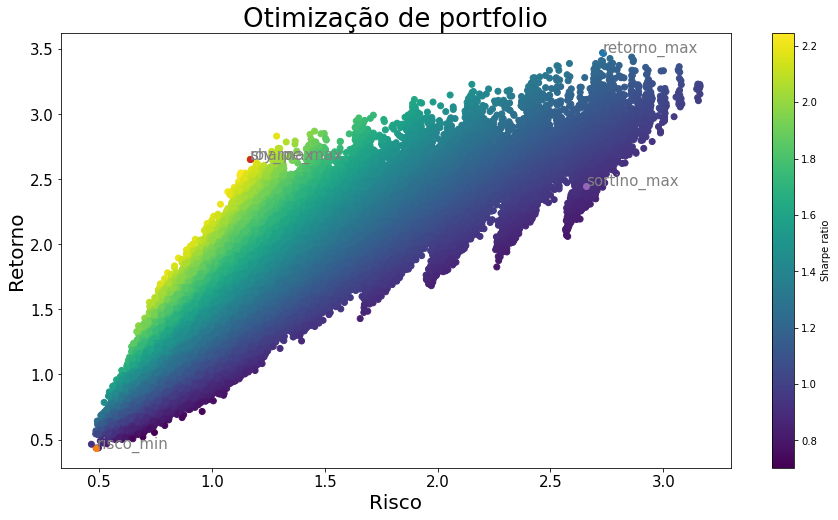

In [428]:
#Vamos visualizar melhor essa história...
plt.figure(figsize=(15,8))
plt.scatter(df4['risco'], df4['retorno'], c = df4['sharpe'])
plt.colorbar(label = 'Sharpe ratio')

plt.title('Otimização de portfolio', fontsize = 26)
plt.xlabel('Risco', fontsize = 20)
plt.ylabel('Retorno', fontsize = 20)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

pontos_criticos = [retorno_max, risco_min, roy_max, sharpe_max, sortino_max]

for ponto in pontos_criticos:
    plt.scatter(x = ponto['risco'], y = ponto['retorno'])
    plt.text(x = ponto['risco'], y = ponto['retorno'], s = ponto.name, fontdict=dict(color='grey',size=15))


plt.show()

In [433]:
df_portfolios = df4.copy()

In [435]:
df_portfolios.to_csv(r"C:\Users\Alexandre\OneDrive\Documentos\1. PRO\Data Science\Projeto Integrador\Dados\portfolios\df_portfolios.csv")

In [471]:
index = np.nonzero(df_portfolios['pesos_all'][0])[0]
index

array([ 0,  2,  5,  8, 18], dtype=int64)

In [488]:
df_portfolios['pesos_all'].iloc[[0]][0]

[0.05,
 0.0,
 0.1,
 0.0,
 0.0,
 0.05,
 0.0,
 0.0,
 0.4,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.4,
 0.0,
 0.0,
 0.0]

In [482]:
np.nonzero(df_portfolios['pesos_all'][0])[0]

array([ 0,  2,  5,  8, 18], dtype=int64)

In [449]:
df4

,pesos,cryptos,retorno,risco,sharpe,sortino,roy_safety_first,pesos_all
0,"[0.05, 0.05, 0.1, 0.4, 0.4]","[BTC-USD, XMR-USD, XLM-USD, ETH-USD, ADA-USD]",1.301892,1.106818,1.149143,1.797574,1.040724,"[0.05, 0.0, 0.1, 0.0, 0.0, 0.05, 0.0, 0.0, 0.4..."
1,"[0.05, 0.05, 0.1, 0.4, 0.4]","[XMR-USD, XLM-USD, ETC-USD, NEO-USD, TRX-USD]",1.663646,1.337683,1.221250,2.127255,1.131543,"[0.0, 0.0, 0.1, 0.0, 0.0, 0.05, 0.0, 0.0, 0.0,..."
2,"[0.05, 0.05, 0.1, 0.4, 0.4]","[DOGE-USD, LTC-USD, DASH-USD, MKR-USD, LINK-USD]",1.839630,1.234790,1.465537,2.652283,1.368354,"[0.0, 0.05, 0.0, 0.05, 0.4, 0.0, 0.0, 0.0, 0.0..."
3,"[0.05, 0.05, 0.1, 0.4, 0.4]","[BTC-USD, DOGE-USD, XMR-USD, MIOTA-USD, BCH-USD]",2.006502,1.177480,1.678587,2.712104,1.576674,"[0.05, 0.4, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,"[0.05, 0.05, 0.1, 0.4, 0.4]","[DOGE-USD, XMR-USD, LTC-USD, DASH-USD, USDT-USD]",0.828651,0.806321,0.990489,1.581053,0.841664,"[0.0, 0.4, 0.05, 0.1, 0.05, 0.0, 0.0, 0.4, 0.0..."
...,...,...,...,...,...,...,...,...
197595,"[0.4, 0.4, 0.1, 0.05, 0.05]","[XLM-USD, XRP-USD, USDT-USD, MKR-USD, ADA-USD]",2.462071,2.695893,0.902139,4.140697,0.857627,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.05, 0.05, 0.1, 0.0..."
197596,"[0.4, 0.4, 0.1, 0.05, 0.05]","[DASH-USD, ETH-USD, EOS-USD, BCH-USD, FIL-USD]",1.287845,1.192891,1.054451,1.736461,0.953855,"[0.0, 0.0, 0.0, 0.0, 0.4, 0.0, 0.0, 0.0, 0.05,..."
197597,"[0.4, 0.4, 0.1, 0.05, 0.05]","[BTC-USD, XMR-USD, NEO-USD, BCH-USD, BNB-USD]",1.304680,1.099669,1.159149,1.718672,1.050025,"[0.05, 0.0, 0.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
197598,"[0.4, 0.4, 0.1, 0.05, 0.05]","[BTC-USD, ETH-USD, NEO-USD, XTZ-USD, THETA-USD]",0.920174,0.924378,0.962997,1.288713,0.833180,"[0.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05,..."


## Aplicação final

In [ ]:
df5 = gera_portfolios_2(lista_ativos=ativos, df_retornos = df_retornos, df_fin = df_fin, matriz_covar=matriz_covar, lista_pesos=[0.05, 0.1 ,0.15, 0.2, 0.25, 0.3, 0.35, 0.4], n_componentes=5)
df5

,pesos,cryptos,retorno,risco,sharpe,sortino,roy_safety_first,pesos_all
0,"[0.1, 0.4, 0.05, 0.4, 0.05]","[BTC-USD, USDT-USD, EOS-USD, BNB-USD, THETA-USD]",1.157082,0.732101,1.539518,2.435072,1.375606,"[0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.0, ..."
1,"[0.05, 0.4, 0.1, 0.05, 0.4]","[DASH-USD, XRP-USD, MKR-USD, BCH-USD, THETA-USD]",1.756554,1.272600,1.356714,2.511864,1.262419,"[0.0, 0.0, 0.0, 0.0, 0.05, 0.0, 0.4, 0.0, 0.0,..."
2,"[0.4, 0.4, 0.05, 0.05, 0.1]","[DOGE-USD, ETH-USD, MKR-USD, EOS-USD, TRX-USD]",1.725375,1.190460,1.424134,2.413892,1.323333,"[0.0, 0.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, ..."
3,"[0.1, 0.05, 0.4, 0.4, 0.05]","[DASH-USD, USDT-USD, NEO-USD, TRX-USD, ADA-USD]",1.640427,1.256270,1.281911,2.183872,1.186390,"[0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.05, 0.0,..."
4,"[0.05, 0.4, 0.05, 0.4, 0.1]","[LTC-USD, USDT-USD, ETH-USD, EOS-USD, BNB-USD]",0.960881,0.811314,1.147374,1.801140,0.999466,"[0.0, 0.0, 0.0, 0.05, 0.0, 0.0, 0.0, 0.4, 0.05..."
...,...,...,...,...,...,...,...,...
197595,"[0.4, 0.05, 0.4, 0.05, 0.1]","[XMR-USD, NEO-USD, TRX-USD, LINK-USD, THETA-USD]",1.636483,1.174665,1.367609,2.254620,1.265452,"[0.0, 0.0, 0.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
197596,"[0.05, 0.4, 0.4, 0.05, 0.1]","[LTC-USD, MKR-USD, TRX-USD, XTZ-USD, THETA-USD]",2.943991,2.754189,1.058021,4.270183,1.014451,"[0.0, 0.0, 0.0, 0.05, 0.0, 0.0, 0.0, 0.0, 0.0,..."
197597,"[0.1, 0.05, 0.05, 0.4, 0.4]","[BTC-USD, USDT-USD, NEO-USD, MKR-USD, MIOTA-USD]",3.182879,2.677716,1.177451,4.773606,1.132637,"[0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05, 0.0,..."
197598,"[0.05, 0.4, 0.1, 0.4, 0.05]","[LTC-USD, DASH-USD, XLM-USD, ADA-USD, FIL-USD]",1.133061,1.119974,0.984899,1.612028,0.877753,"[0.0, 0.0, 0.0, 0.05, 0.4, 0.1, 0.0, 0.0, 0.0,..."


In [522]:
df5.astype(str).duplicated().sum()

352

In [588]:
#Identificando os portfólios "campeões":
retorno_max = df5.iloc[df5['retorno'].astype(float).idxmax()]
retorno_max.name = 'retorno_max'
retorno_max

pesos                                     [0.05, 0.4, 0.3, 0.05, 0.2]
cryptos               [XLM-USD, MKR-USD, MIOTA-USD, BNB-USD, FIL-USD]
retorno                                                      3.473173
risco                                                        2.863775
sharpe                                                        1.20232
sortino                                                      5.361421
roy_safety_first                                             1.160417
pesos_all           [0.0, 0.0, 0.0, 0.0, 0.0, 0.05, 0.0, 0.0, 0.0,...
Name: retorno_max, dtype: object

In [589]:
risco_min = df5.iloc[df5['risco'].astype(float).idxmin()]
risco_min.name = 'risco_min'
risco_min

pesos                                     [0.4, 0.05, 0.4, 0.1, 0.05]
cryptos               [BTC-USD, DASH-USD, USDT-USD, ETH-USD, BNB-USD]
retorno                                                      0.562842
risco                                                         0.48075
sharpe                                                       1.108355
sortino                                                      1.172435
roy_safety_first                                             0.858745
pesos_all           [0.4, 0.0, 0.0, 0.0, 0.05, 0.0, 0.0, 0.4, 0.1,...
Name: risco_min, dtype: object

In [590]:
sharpe_max = df5.iloc[df5['sharpe'].astype(float).idxmax()]
sharpe_max.name = 'sharpe_max'
sharpe_max

pesos                                   [0.05, 0.25, 0.4, 0.15, 0.15]
cryptos             [XLM-USD, USDT-USD, MIOTA-USD, BNB-USD, LINK-USD]
retorno                                                      1.986884
risco                                                        0.881562
sharpe                                                       2.219791
sortino                                                      3.392463
roy_safety_first                                             2.083669
pesos_all           [0.0, 0.0, 0.0, 0.0, 0.0, 0.05, 0.0, 0.25, 0.0...
Name: sharpe_max, dtype: object

In [591]:
sortino_max = df5.iloc[df5['sortino'].astype(float).idxmax()]
sortino_max.name = 'sortino_max'
sortino_max

pesos                                     [0.35, 0.4, 0.1, 0.1, 0.05]
cryptos             [USDT-USD, MKR-USD, MIOTA-USD, LINK-USD, FIL-USD]
retorno                                                       2.52276
risco                                                        2.616519
sharpe                                                       0.952701
sortino                                                       6.13494
roy_safety_first                                             0.906839
pesos_all           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.35, 0.0,...
Name: sortino_max, dtype: object

In [592]:
roy_max = df5.iloc[df5['roy_safety_first'].astype(float).idxmax()]
roy_max.name = 'roy_max'
roy_max

pesos                                     [0.1, 0.4, 0.3, 0.15, 0.05]
cryptos              [ETH-USD, MIOTA-USD, BNB-USD, LINK-USD, FIL-USD]
retorno                                                      2.511667
risco                                                        1.120309
sharpe                                                       2.215164
sortino                                                      3.522229
roy_safety_first                                             2.108051
pesos_all           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, ...
Name: roy_max, dtype: object

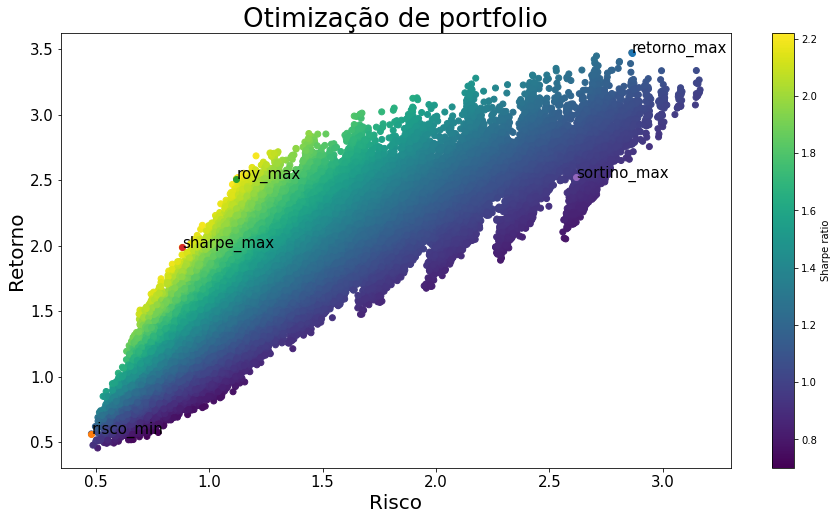

In [593]:
#Vamos visualizar melhor essa história...
plt.figure(figsize=(15,8))
plt.scatter(df5['risco'], df5['retorno'], c = df5['sharpe'])
plt.colorbar(label = 'Sharpe ratio')

plt.title('Otimização de portfolio', fontsize = 26)
plt.xlabel('Risco', fontsize = 20)
plt.ylabel('Retorno', fontsize = 20)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

pontos_criticos = [retorno_max, risco_min, roy_max, sharpe_max, sortino_max]

for ponto in pontos_criticos:
    plt.scatter(x = ponto['risco'], y = ponto['retorno'])
    plt.text(x = ponto['risco'], y = ponto['retorno'], s = ponto.name, fontdict=dict(color='black',size=15))


plt.savefig('197600_portfolios')
plt.show()

1 - Conservador: risco_min <br>
2 - Moderado: sharpe_max <br>
3 - Dinâmico: roy_max <br>
4 - Arrojado: sortino_max <br>
5 - Agressivo: retorno_max <br>

In [530]:
df_portfolios = df5.copy()

In [532]:
df_portfolios.to_csv(r"C:\Users\Alexandre\OneDrive\Documentos\1. PRO\Data Science\Projeto Integrador\Dados\portfolios\df_portfolios.csv")

## Tentativa com mais iterações (1000 por vetor de peso)

In [556]:
df6 = gera_portfolios_2(lista_ativos=ativos, df_retornos = df_retornos, df_fin = df_fin, matriz_covar=matriz_covar, lista_pesos=[0.05, 0.1 ,0.15, 0.2, 0.25, 0.3, 0.35, 0.4], n_componentes=5, n_iter = 1000)

In [557]:
df6

,pesos,cryptos,retorno,risco,sharpe,sortino,roy_safety_first,pesos_all
0,"[0.05, 0.4, 0.1, 0.05, 0.4]","[XRP-USD, ETH-USD, EOS-USD, FIL-USD, THETA-USD]",1.698296,1.092797,1.526629,2.319164,1.416819,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05, 0.0, 0.4,..."
1,"[0.1, 0.4, 0.4, 0.05, 0.05]","[BTC-USD, DOGE-USD, XMR-USD, XRP-USD, USDT-USD]",1.161397,1.040200,1.087673,1.608882,0.972311,"[0.1, 0.4, 0.4, 0.0, 0.0, 0.0, 0.05, 0.05, 0.0..."
2,"[0.1, 0.05, 0.4, 0.05, 0.4]","[DOGE-USD, XRP-USD, NEO-USD, MIOTA-USD, TRX-USD]",1.863805,1.297891,1.412911,2.391347,1.320453,"[0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.05, 0.0, 0.0,..."
3,"[0.4, 0.1, 0.05, 0.05, 0.4]","[XRP-USD, MKR-USD, LINK-USD, ADA-USD, THETA-USD]",1.828231,1.285053,1.399343,2.646222,1.305962,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.0, 0.0, ..."
4,"[0.4, 0.4, 0.05, 0.1, 0.05]","[BTC-USD, DOGE-USD, DASH-USD, MIOTA-USD, ADA-USD]",1.255272,1.015840,1.206166,1.812771,1.088037,"[0.4, 0.4, 0.0, 0.0, 0.05, 0.0, 0.0, 0.0, 0.0,..."
...,...,...,...,...,...,...,...,...
1975995,"[0.1, 0.05, 0.4, 0.4, 0.05]","[LTC-USD, ETH-USD, ETC-USD, BNB-USD, ADA-USD]",1.727082,1.248861,1.358904,2.258672,1.262816,"[0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.05,..."
1975996,"[0.1, 0.4, 0.05, 0.4, 0.05]","[XRP-USD, ETH-USD, NEO-USD, ADA-USD, FIL-USD]",1.394293,1.131399,1.205847,1.940473,1.099783,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.4, ..."
1975997,"[0.1, 0.05, 0.05, 0.4, 0.4]","[XLM-USD, ETH-USD, EOS-USD, BCH-USD, LINK-USD]",1.847966,1.167246,1.557483,2.436125,1.454677,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.05,..."
1975998,"[0.05, 0.4, 0.05, 0.4, 0.1]","[BTC-USD, USDT-USD, ETH-USD, TRX-USD, LINK-USD]",1.165391,0.852710,1.331510,2.309587,1.190782,"[0.05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.05..."


In [558]:
df6.astype(str).duplicated().sum()

33179

In [578]:
#Identificando os portfólios "campeões":
retorno_max = df6.iloc[df6['retorno'].astype(float).idxmax()]
retorno_max.name = 'retorno_max'
retorno_max

pesos                                     [0.4, 0.35, 0.1, 0.05, 0.1]
cryptos               [MKR-USD, MIOTA-USD, BNB-USD, TRX-USD, FIL-USD]
retorno                                                      3.477592
risco                                                        2.766533
sharpe                                                       1.246178
sortino                                                      5.722745
roy_safety_first                                             1.202802
pesos_all           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: retorno_max, dtype: object

In [585]:
risco_min = df6.iloc[df6['risco'].astype(float).idxmin()]
risco_min.name = 'risco_min'
risco_min

pesos                                     [0.4, 0.1, 0.4, 0.05, 0.05]
cryptos              [BTC-USD, DASH-USD, USDT-USD, ETH-USD, LINK-USD]
retorno                                                      0.528371
risco                                                        0.475449
sharpe                                                       1.048212
sortino                                                      1.079233
roy_safety_first                                             0.795818
pesos_all           [0.4, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.4, 0.05,...
Name: risco_min, dtype: object

In [580]:
sharpe_max = df6.iloc[df6['sharpe'].astype(float).idxmax()]
sharpe_max.name = 'sharpe_max'
sharpe_max

pesos                                     [0.05, 0.4, 0.15, 0.3, 0.1]
cryptos              [MKR-USD, MIOTA-USD, BNB-USD, LINK-USD, FIL-USD]
retorno                                                      2.738031
risco                                                        1.201065
sharpe                                                       2.254691
sortino                                                      4.214518
roy_safety_first                                              2.15478
pesos_all           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: sharpe_max, dtype: object

In [581]:
sortino_max = df6.iloc[df6['sortino'].astype(float).idxmax()]
sortino_max.name = 'sortino_max'
sortino_max

pesos                                     [0.4, 0.4, 0.05, 0.05, 0.1]
cryptos               [USDT-USD, MKR-USD, BNB-USD, LINK-USD, FIL-USD]
retorno                                                      2.355162
risco                                                        2.647454
sharpe                                                       0.878263
sortino                                                      6.263841
roy_safety_first                                             0.832937
pesos_all           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.0, ...
Name: sortino_max, dtype: object

In [582]:
roy_max = df6.iloc[df6['roy_safety_first'].astype(float).idxmax()]
roy_max.name = 'roy_max'
roy_max

pesos                                     [0.05, 0.4, 0.15, 0.3, 0.1]
cryptos              [MKR-USD, MIOTA-USD, BNB-USD, LINK-USD, FIL-USD]
retorno                                                      2.738031
risco                                                        1.201065
sharpe                                                       2.254691
sortino                                                      4.214518
roy_safety_first                                              2.15478
pesos_all           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: roy_max, dtype: object

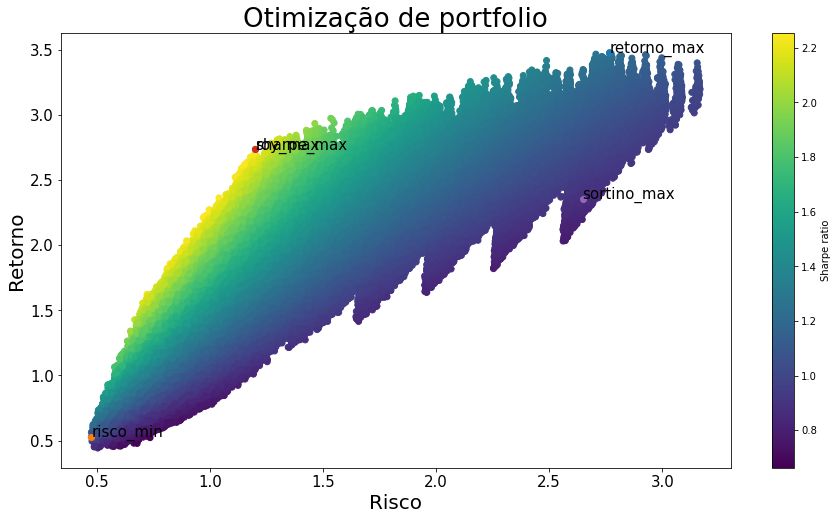

In [586]:
#Vamos visualizar melhor essa história...
plt.figure(figsize=(15,8))
plt.scatter(df6['risco'], df6['retorno'], c = df6['sharpe'])
plt.colorbar(label = 'Sharpe ratio')

plt.title('Otimização de portfolio', fontsize = 26)
plt.xlabel('Risco', fontsize = 20)
plt.ylabel('Retorno', fontsize = 20)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

pontos_criticos = [retorno_max, risco_min, roy_max, sharpe_max, sortino_max]

for ponto in pontos_criticos:
    plt.scatter(x = ponto['risco'], y = ponto['retorno'])
    plt.text(x = ponto['risco'], y = ponto['retorno'], s = ponto.name, fontdict=dict(color='black',size=15))

#plt.savefig('19760000_portfolios')
plt.show()

1 - Conservador: risco_min <br>
2 - Moderado: sharpe_max <br>
3 - Dinâmico: roy_max <br>
4 - Arrojado: sortino_max <br>
5 - Agressivo: retorno_max <br>

In [565]:
df_portfolios_1000 = df6.copy()

In [566]:
df_portfolios_1000.to_csv(r"C:\Users\Alexandre\OneDrive\Documentos\1. PRO\Data Science\Projeto Integrador\Dados\portfolios\df_portfolios_1000.csv")

In [567]:
#Idealmente, "cuspir" apenas os 5 portfolios de interesse.

# Retornando os portfolios escolhidos

In [596]:
df_portfolios_escolhidos = pd.DataFrame([risco_min, sharpe_max, roy_max, sortino_max, retorno_max])
df_portfolios_escolhidos

,pesos,cryptos,retorno,risco,sharpe,sortino,roy_safety_first,pesos_all
risco_min,"[0.4, 0.05, 0.4, 0.1, 0.05]","[BTC-USD, DASH-USD, USDT-USD, ETH-USD, BNB-USD]",0.562842,0.480750,1.108355,1.172435,0.858745,"[0.4, 0.0, 0.0, 0.0, 0.05, 0.0, 0.0, 0.4, 0.1,..."
sharpe_max,"[0.05, 0.25, 0.4, 0.15, 0.15]","[XLM-USD, USDT-USD, MIOTA-USD, BNB-USD, LINK-USD]",1.986884,0.881562,2.219791,3.392463,2.083669,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.05, 0.0, 0.25, 0.0..."
roy_max,"[0.1, 0.4, 0.3, 0.15, 0.05]","[ETH-USD, MIOTA-USD, BNB-USD, LINK-USD, FIL-USD]",2.511667,1.120309,2.215164,3.522229,2.108051,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, ..."
sortino_max,"[0.35, 0.4, 0.1, 0.1, 0.05]","[USDT-USD, MKR-USD, MIOTA-USD, LINK-USD, FIL-USD]",2.522760,2.616519,0.952701,6.134940,0.906839,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.35, 0.0,..."
retorno_max,"[0.05, 0.4, 0.3, 0.05, 0.2]","[XLM-USD, MKR-USD, MIOTA-USD, BNB-USD, FIL-USD]",3.473173,2.863775,1.202320,5.361421,1.160417,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.05, 0.0, 0.0, 0.0,..."


In [597]:
df_portfolios_escolhidos.to_csv(r"C:\Users\Alexandre\OneDrive\Documentos\1. PRO\Data Science\Projeto Integrador\Dados\portfolios\df_portfolios_escolhidos.csv")

In [598]:
#Incluir na função o retorno com os 5 porfolios escolhidos.

In [613]:
df_portfolios_escolhidos[['pesos', 'cryptos']].iloc[0][0]

[0.4, 0.05, 0.4, 0.1, 0.05]